# Exercise Eight: Cultural Data

For this exercise, pick a dataset of current or historical cultural data available in CSV format from one of the suggeted sources, or your own research. This will be easiest if your data includes some element of information over time. You'll be using the "group by" methods we discussed this week to make comparisons within the dataset: you might group by geography, party affiliation, age, gender, or other information marked in the dataset.

Your annotated code should include headings, and discuss your findings as well as the limitations in what you can visualize using this approach. This exercise should:

- Import your selected structured CSV data
- Use Pandas to note any preliminary trends in the CSV as a dataframe
- Use "group by" to break down at least two different subsets of data
- Plot a comparison between the grouped data (this will be easiest over time)
- Use one additional form of analysis or visualization from any we've tried so far

## Import Structured CSV Data

The original data file was on Kaggle.  I used Microsoft Excel to delete unnecessary fields, including height and weight, and remove duplicate entries as the original file exceeded Git Hub file size limitations.

In [1]:
import pandas as pd
df = pd.read_csv('olympicathletes.csv')
print(df.dtypes)

ID          int64
Name       object
Sex        object
Age       float64
NOC        object
Year        int64
Season     object
City       object
Sport      object
Medal      object
dtype: object


## Use Pandas to Note Preliminary Trends as a Dataframe

I am looking to see the impact of Title IX legislation and similar measures in other countries to track the number of female vs. male athletes participating in the Olympic Games by tracking participation over time.  I will set the index as year.  

In [2]:
print(df[['Name','Sex']].head())

                       Name Sex
0                 A Dijiang   M
1                  A Lamusi   M
2       Gunnar Nielsen Aaby   M
3      Edgar Lindenau Aabye   M
4  Christine Jacoba Aaftink   F


In [3]:
df = pd.read_csv('olympicathletes.csv')
df = df.set_index('Year')
df.head()

,ID,Name,Sex,Age,NOC,Season,City,Sport,Medal
Year,,,,,,,,,
1992,1,A Dijiang,M,24.0,CHN,Summer,Barcelona,Basketball,NaN
2012,2,A Lamusi,M,23.0,CHN,Summer,London,Judo,NaN
1920,3,Gunnar Nielsen Aaby,M,24.0,DEN,Summer,Antwerpen,Football,NaN
1900,4,Edgar Lindenau Aabye,M,34.0,DEN,Summer,Paris,Tug-Of-War,Gold
1988,5,Christine Jacoba Aaftink,F,21.0,NED,Winter,Calgary,Speed Skating,NaN


## Use "groupby" to breakdown subsets of data

Grouping data by gender and creating the comparion by year.  In terms of process, this is useful, but much easier for me to complete in Excel using pivot tables.

In [4]:
genders = df.groupby('Sex')


In [6]:
genders_comparison = df.groupby(['Year','Sex'])['Name'].count()
genders_comparison.head()

Year  Sex
1896  M       265
1900  F        25
      M      1458
1904  F         9
      M       833
Name: Name, dtype: int64

## Plot comparison between grouped data

Title IX became law in 1972.  By the line graph, it is clear that female participation increased signficantly over the next decade, and continues to increase steadily.  Male participation also increased in the 1960's through 1980's as the Olympic Games grew in size, however male participation dropped slightly in the 1990's and has plateaued generally since that time.  

There is "noise" in the visualization due to the separation of the Summer and Winter Games in 1994, with those events now alternating every other year.  The Summer Olympics attract a larger number of total athletes than the Winter. This visualization would be more helpful if it was split into separate visualizations for both Summer and Winter Olympics.

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Name, dtype: object

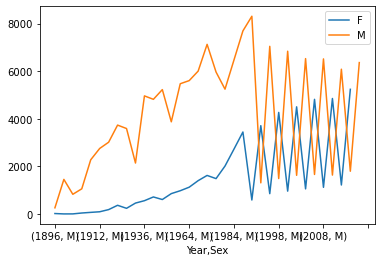

In [7]:
genders_comparison.groupby(['Sex']).plot(legend=True)

## Additional Visualizations

I tried a few things to help with the Winter/Summer issue.

1. Histrogram by gender.  This visualization is particularly unhelpful.
2. Bar graph.  This one seemed to display only one gender although both are noted.
3. Trying one of the other tools.  This is a complete failure as I do not have the correct syntax.

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Name, dtype: object

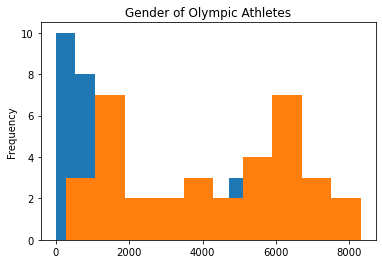

In [10]:
genders_comparison.groupby(['Sex']).plot(kind="hist", title="Gender of Olympic Athletes")

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Name, dtype: object

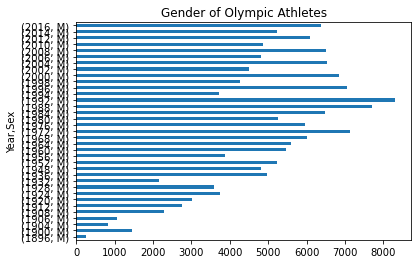

In [12]:
genders_comparison.groupby(['Sex']).plot(kind="barh", title="Gender of Olympic Athletes")

TypeError: unsupported operand type(s) for -: 'method' and 'float'

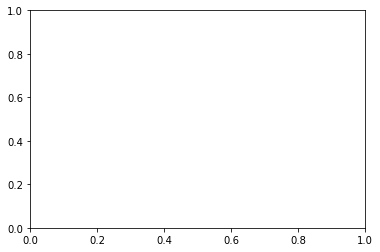

In [18]:
import matplotlib.pyplot as plt

x = genders_comparison.groupby
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, M_counts, width, label='Men')
rects2 = ax.bar(x + width/2, F_counts, width, label='Women')

ax.set_ylabel('Athletes')
ax.set_title('Year and Gender')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()